In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

!pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/prash/Downloads/ML_Python/project/bitcoin(2014-2024).csv")

In [3]:
df.head()
df.shape

(3514, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3513.000000,3513.000000,3513.000000,3513.000000,3513.000000,3.513000e+03
mean,16018.515678,16391.794956,15618.516781,16035.002153,16035.002153,1.715612e+10
std,17765.973162,18188.592169,17296.208671,17779.152741,17779.152741,1.927199e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1021.599976,1044.640015,996.921021,1026.430054,1026.430054,2.161820e+08
50%,8704.631836,8879.511719,8471.933594,8708.094727,8708.094727,1.282699e+10
75%,26858.011720,27289.169920,26549.734380,26862.375000,26862.375000,2.770653e+10
max,73079.375000,73750.070310,71334.093750,73083.500000,73083.500000,3.509680e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 0 to 3513
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3514 non-null   object 
 1   Open       3513 non-null   float64
 2   High       3513 non-null   float64
 3   Low        3513 non-null   float64
 4   Close      3513 non-null   float64
 5   Adj Close  3513 non-null   float64
 6   Volume     3513 non-null   float64
dtypes: float64(6), object(1)
memory usage: 192.3+ KB


Text(0, 0.5, 'Price in US dollars')

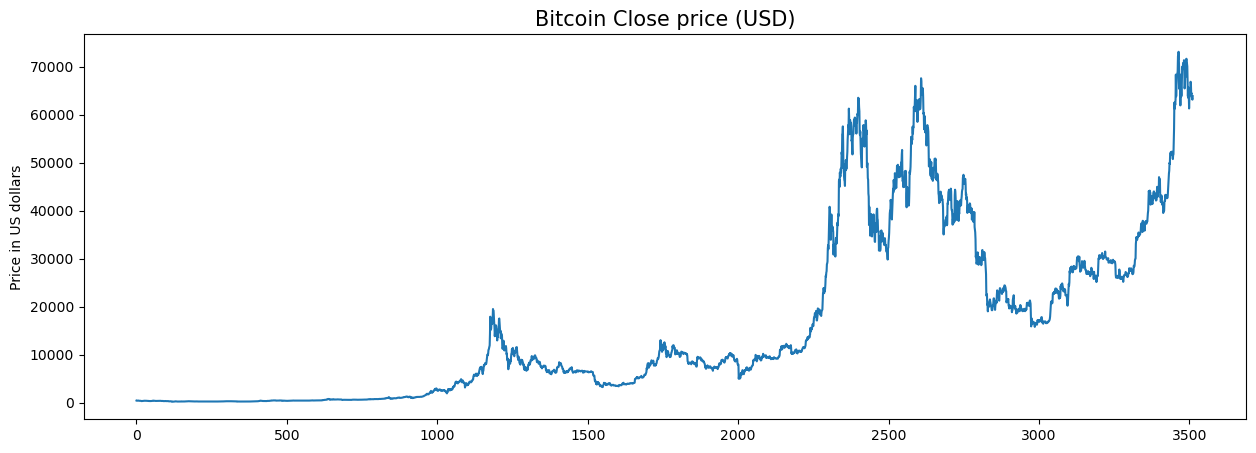

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price (USD)', fontsize=15)
plt.ylabel('Price in US dollars')

In [7]:
df[df['Close']==df['Adj Close']].shape, df.shape

((3513, 7), (3514, 7))

In [8]:
df = df.drop(['Adj Close'], axis=1)

In [9]:
df.isnull().sum()

Date      0
Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.shape

(3513, 6)

In [12]:
features = ['Open','High','Low','Close']

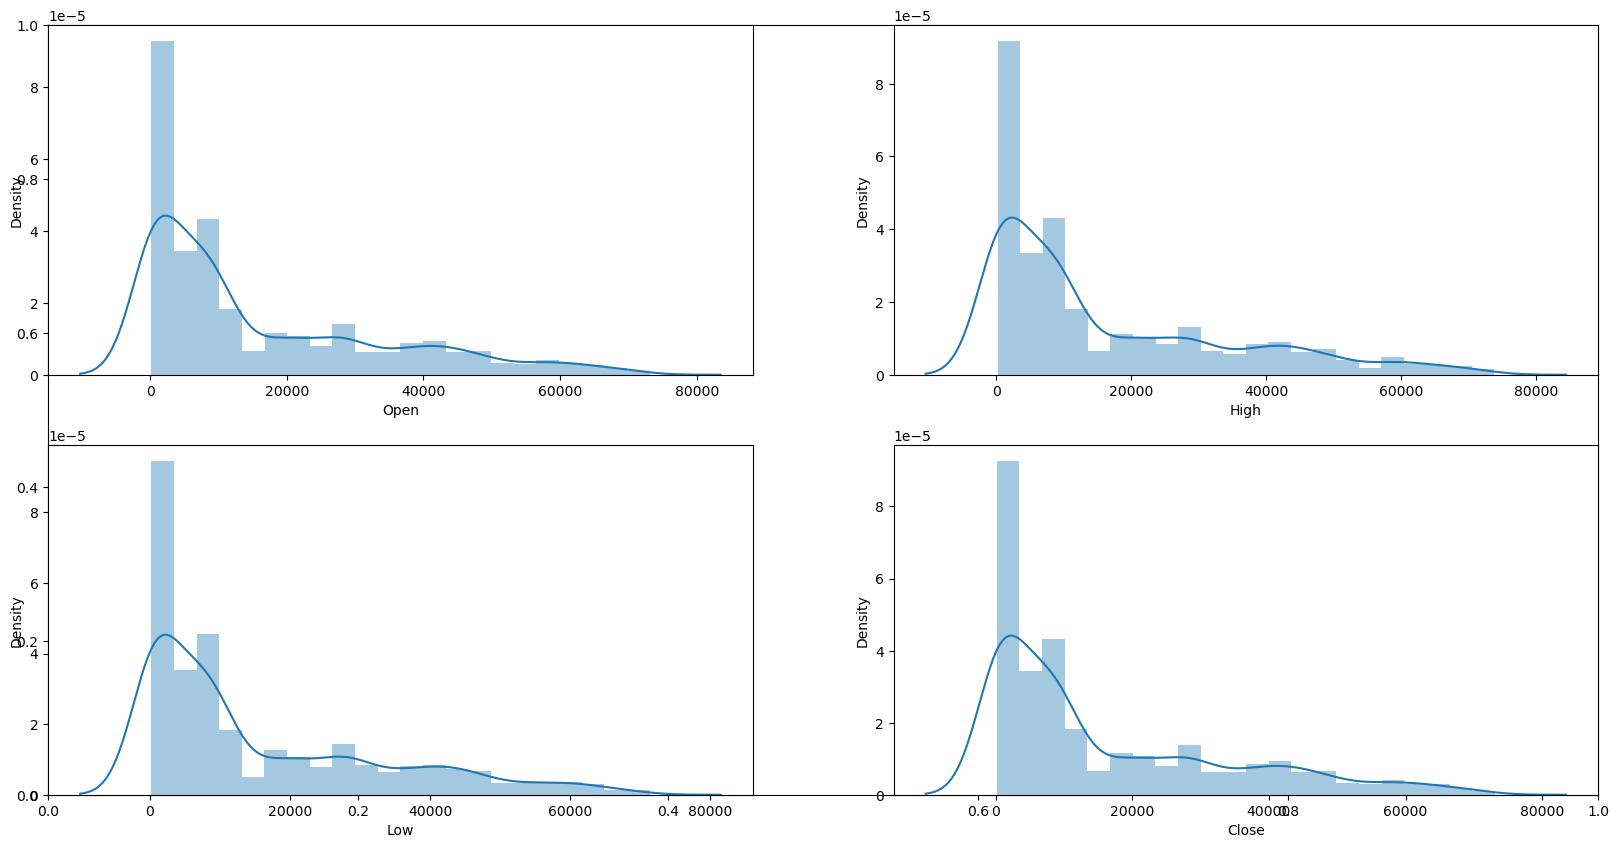

In [13]:
plt.subplots(figsize=(20,10))
for i, col in zip(range(4), features):
    plt.subplot(2,2,i+1)
    snb.distplot(df[col])
plt.show()

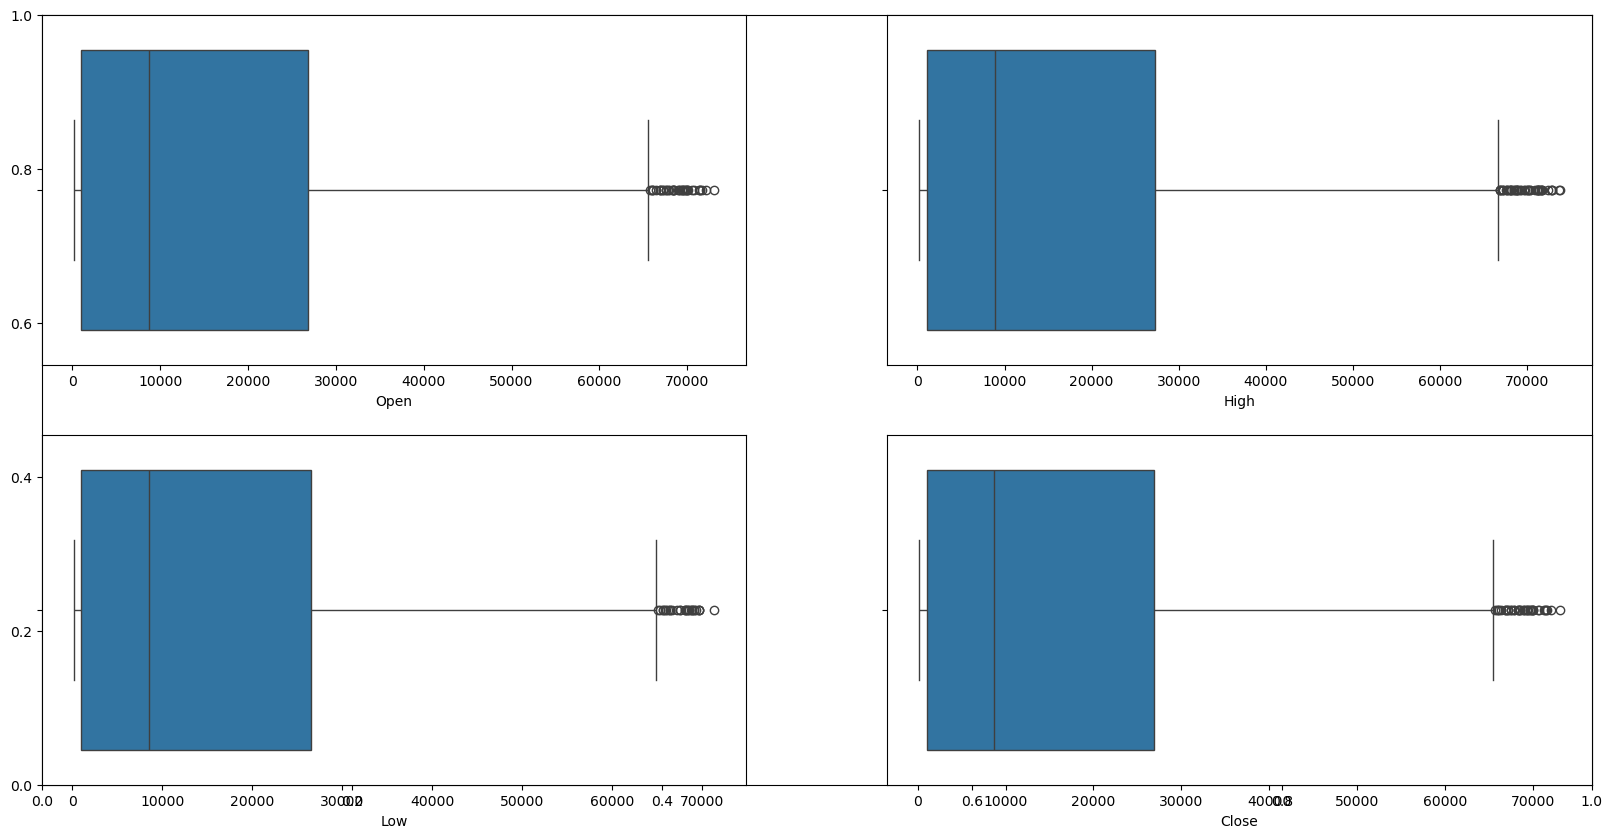

In [14]:
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    snb.boxplot(x = df[col])
plt.show()

In [15]:
#Feature Engineering

In [16]:
splitted = df['Date'].str.split('/', expand=True)
for i, col in enumerate(['month', 'day', 'year']):
    df[col] = splitted[i].astype('int')

In [17]:
df.head()

,Date,Open,High,Low,Close,Volume,month,day,year
0,9/18/2014,456.859985,456.859985,413.104004,424.440002,34483200.0,9,18,2014
1,9/19/2014,424.102997,427.834991,384.532013,394.795990,37919700.0,9,19,2014
2,9/20/2014,394.673004,423.295990,389.882996,408.903992,36863600.0,9,20,2014
3,9/21/2014,408.084991,412.425995,393.181000,398.821014,26580100.0,9,21,2014
4,9/22/2014,399.100006,406.915985,397.130005,402.152008,24127600.0,9,22,2014


In [18]:
df = df.drop(['Date'], axis = 1)

In [19]:
gd = df.groupby('year').mean()

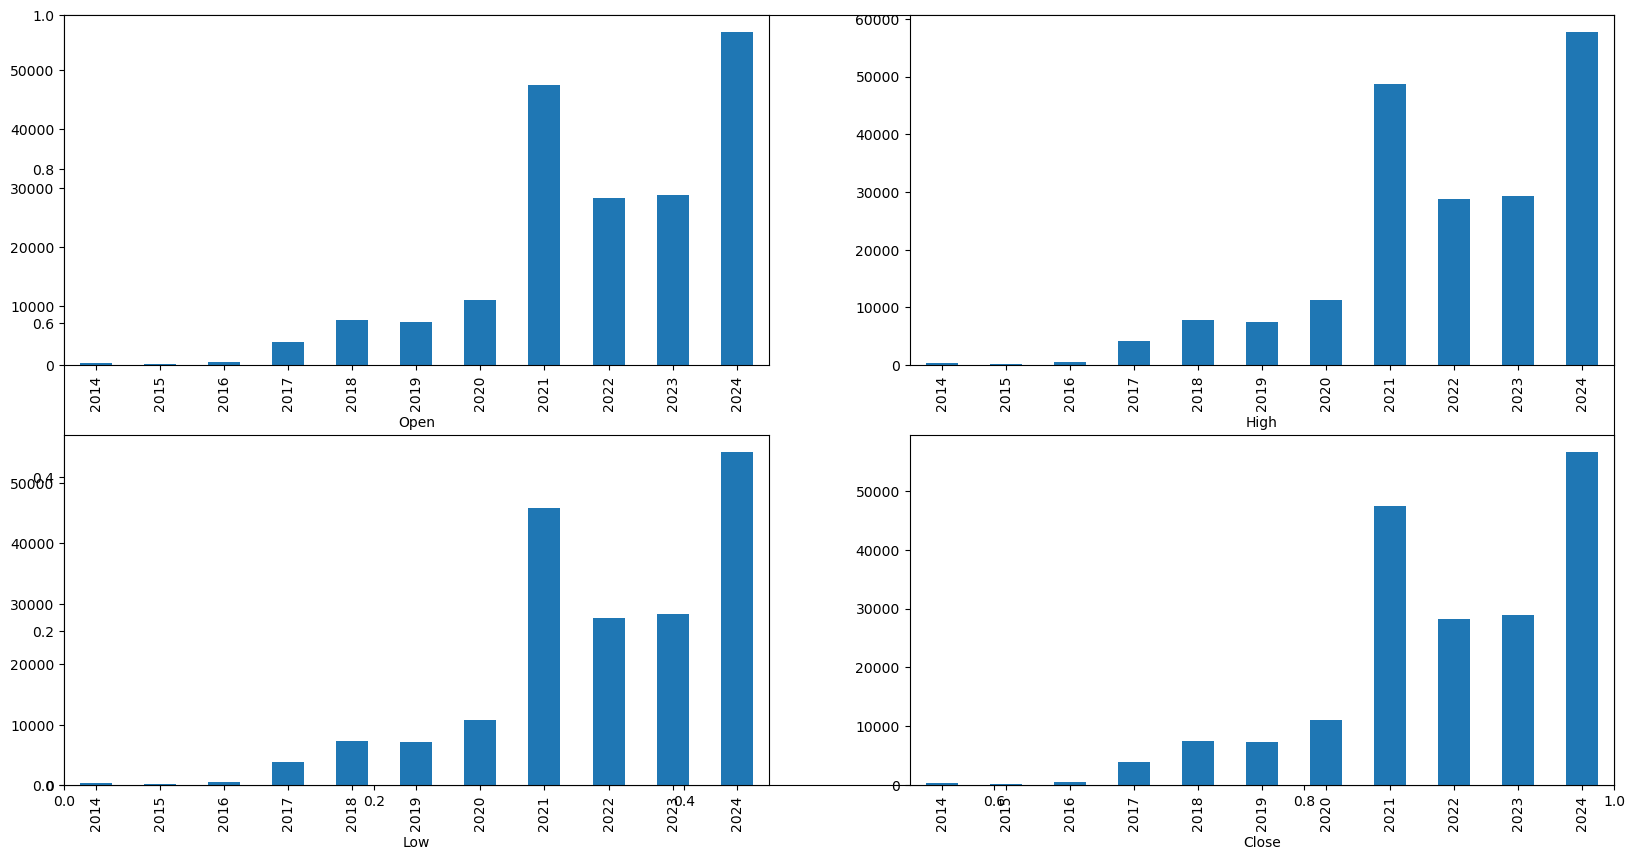

In [20]:
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    gd[col].plot.bar()
    plt.xlabel(col)
plt.show()

In [21]:
df['is_quarter_end'] = np.where(df['month']%3==0, 1, 0)
df.head()

,Open,High,Low,Close,Volume,month,day,year,is_quarter_end
0,456.859985,456.859985,413.104004,424.440002,34483200.0,9,18,2014,1
1,424.102997,427.834991,384.532013,394.795990,37919700.0,9,19,2014,1
2,394.673004,423.295990,389.882996,408.903992,36863600.0,9,20,2014,1
3,408.084991,412.425995,393.181000,398.821014,26580100.0,9,21,2014,1
4,399.100006,406.915985,397.130005,402.152008,24127600.0,9,22,2014,1


In [22]:
df['open-close'] = df['Open']-df['Close']
df['low-high'] = df['Low']-df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0)

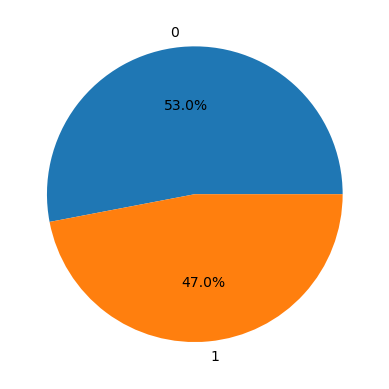

In [23]:
plt.pie(df['target'].value_counts().values,
       labels=[0,1], autopct='%1.1f%%')
plt.show()

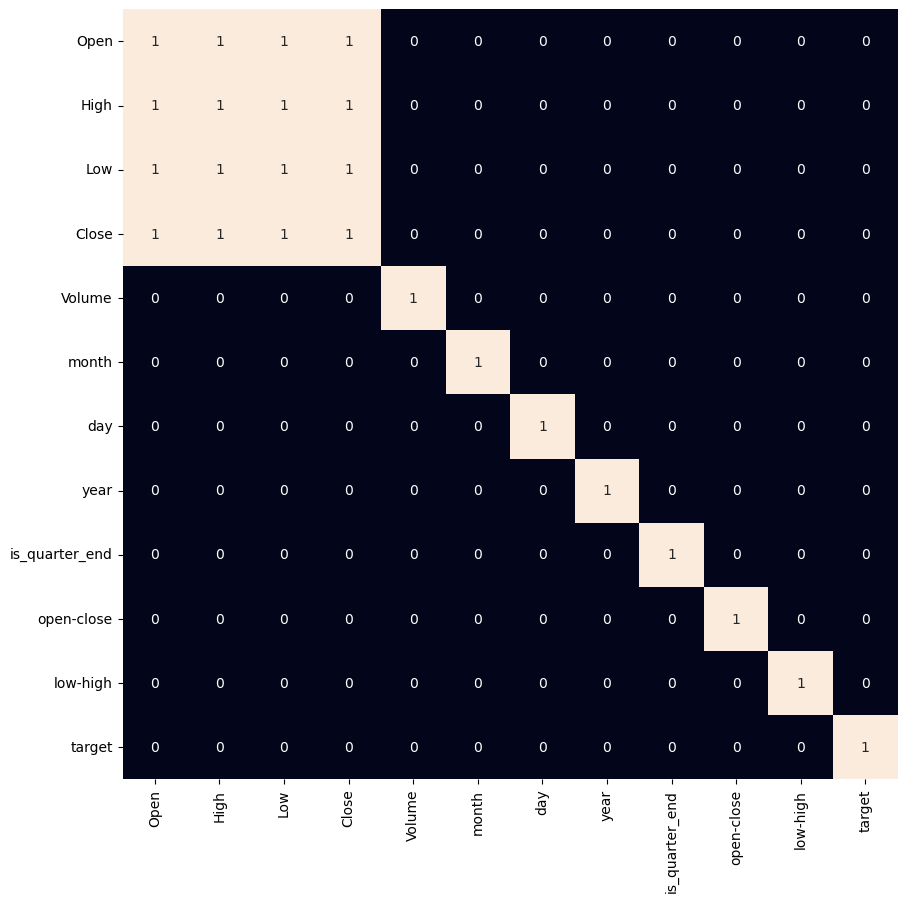

In [24]:
#checking for corelation
plt.figure(figsize=(10,10))
snb.heatmap(df.corr()>0.9, annot=True, cbar=False)
plt.show()

In [25]:
#if the correlation is no high between the added features then we are good to go.

In [26]:
#Model building
ad_features = df[['open-close','low-high','is_quarter_end']]
target = df['target']
#we will use standardization because it is not affected by outliers
scaler = StandardScaler()
ad_features = scaler.fit_transform(ad_features)
x_train, x_valid, y_train, y_valid = train_test_split(ad_features, target, test_size=0.1
                                                     ,random_state=2025)
print(x_train.shape, x_valid.shape)

(3161, 3) (352, 3)


In [27]:
ad_features

array([[ 0.05809749,  0.61537294,  1.41240395],
       [ 0.05439949,  0.61575507,  1.41240395],
       [ 0.00267936,  0.62409755,  1.41240395],
       ...,
       [ 0.38818209, -0.636534  , -0.70801275],
       [-0.85325665, -1.3548284 , -0.70801275],
       [ 1.28606753, -0.32760478, -0.70801275]])

In [28]:
# Training the model
# here we will use Logistic regression, Support Vector machine, XGBClassifier
# we will use ROC-AUC curve (Receiver-operating characteristic curve, Area Under Curve)
#ROC - it is drawn by calculating True Positive Rate and False Positive Rate (TPR & FPR)

In [29]:
# SVC kernels - rbf - gaussian kernel radial basis function
            # sigmoid
            # poly - polynomial kernel
            # linear

In [30]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier(), RandomForestClassifier()]
for i in range(4):
    models[i].fit(x_train, y_train)
    print(models[i],':')
    print('Training Accuracy:',metrics.roc_auc_score(y_train, models[i].predict_proba(x_train)[:,1]))
    print('Validation Accuracy:',metrics.roc_auc_score(y_valid, models[i].predict_proba(x_valid)[:,1]))

LogisticRegression() :
Training Accuracy: 0.5385707051220219
Validation Accuracy: 0.4881706528765352
SVC(kernel='poly', probability=True) :
Training Accuracy: 0.5350499180090673
Validation Accuracy: 0.5092760180995475
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) :
Training Accuracy: 0.9

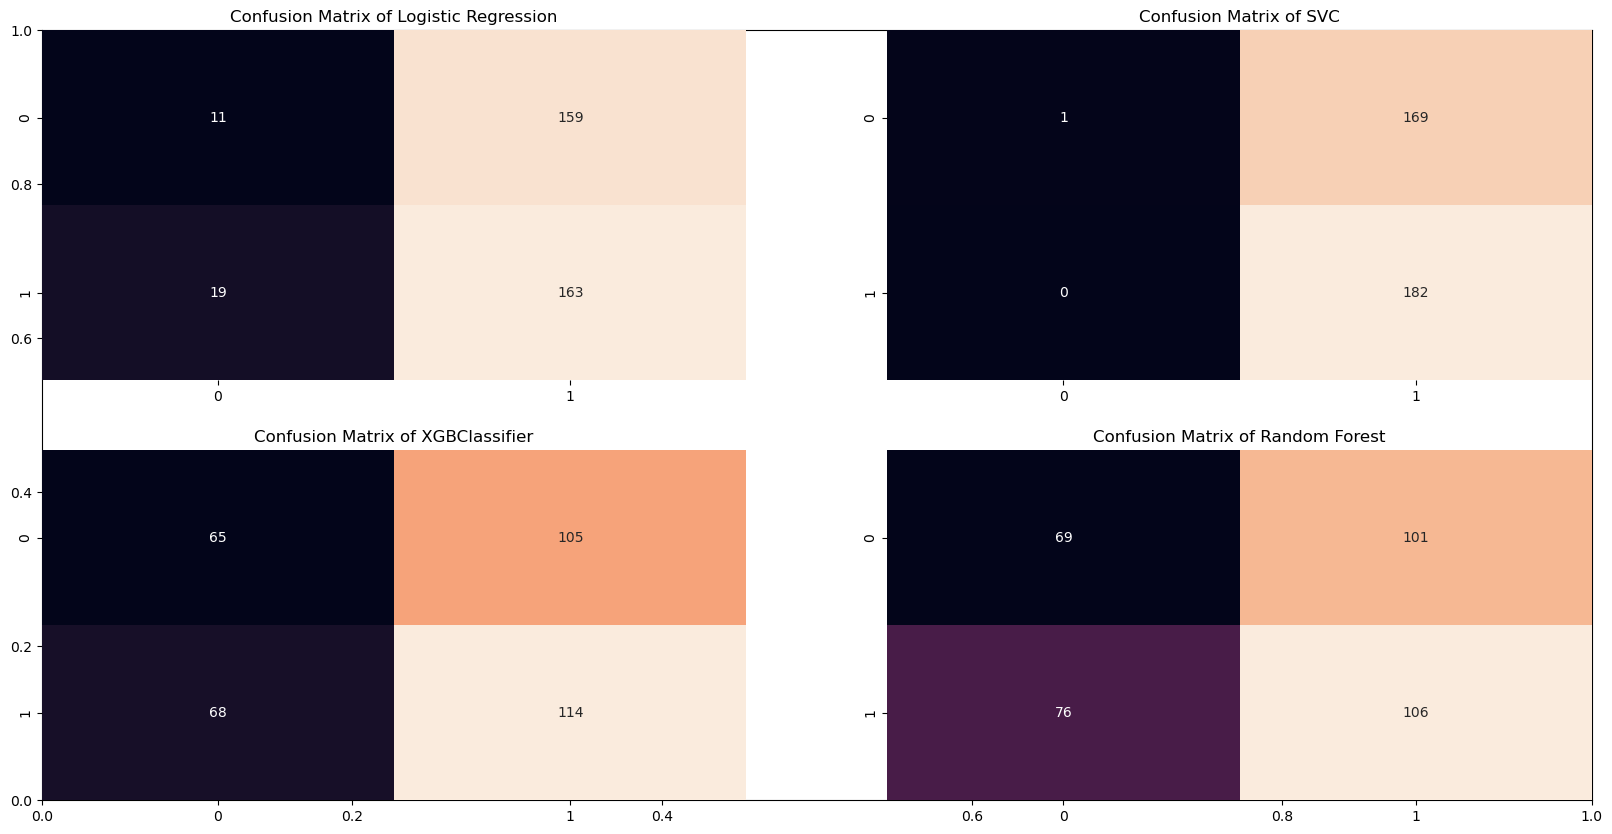

In [68]:
# confusion matrix - TP,FP,TN,FN
md = ['Logistic Regression', 'SVC', 'XGBClassifier', 'Random Forest']
plt.subplots(figsize=(20,10))
for i in range(4):
    y_pred = models[i].predict(x_valid)
    plt.subplot(2,2,i+1)
    cm = confusion_matrix(y_valid, y_pred)
    snb.heatmap(cm, annot=True, fmt='d', cbar=False)
    plt.title(f'Confusion Matrix of {md[i]}')
plt.show()